<a href="https://colab.research.google.com/github/zahidulhasan95503/Houe-price-pridection/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
house_data = pd.read_csv('/content/drive/MyDrive/AI_class/house_price.csv')


In [ ]:
house_data

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,Bommanahalli,3,1,3000,1,3,28000
1,Bommanahalli,3,1,1650,10,0,18000
2,Whitefield,2,0,1000,5,3,16400
3,Whitefield,3,0,1600,1,9,27000
4,Whitefield,2,1,1200,5,1,20000
...,...,...,...,...,...,...,...
995,Bommanahalli,3,1,1460,1,2,25000
996,Whitefield,3,0,2100,1,7,28000
997,Bommanahalli,2,0,1033,5,0,16500
998,Bommanahalli,3,0,1500,10,1,22000


In [ ]:
len(house_data)

1000

In [ ]:
house_data.describe()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.436000,0.348000,1448.613000,4.029000,3.465000,22829.900000
std,0.496135,0.476574,491.272535,3.048845,3.245197,7706.410627
min,2.000000,0.000000,767.000000,1.000000,0.000000,11000.000000
25%,2.000000,0.000000,1089.000000,1.000000,1.000000,16500.000000
50%,2.000000,0.000000,1300.000000,5.000000,3.000000,21000.000000
75%,3.000000,1.000000,1650.000000,5.000000,3.000000,26000.000000
max,3.000000,1.000000,3155.000000,10.000000,13.000000,45000.000000


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Location    1000 non-null   object
 1   BHK         1000 non-null   int64 
 2   Furnishing  1000 non-null   int64 
 3   Sq.ft       1000 non-null   int64 
 4   Old(years)  1000 non-null   int64 
 5   Floor       1000 non-null   int64 
 6   Price       1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


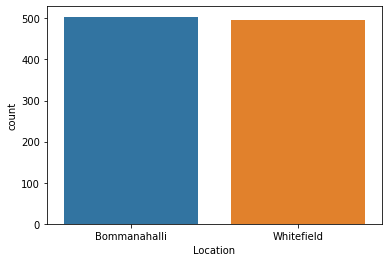

In [ ]:
sns.countplot(x="Location",data = house_data)

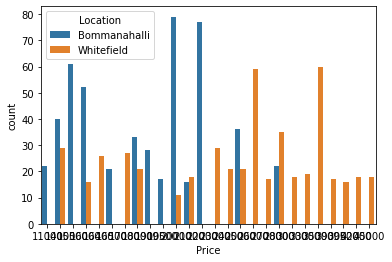

In [ ]:
sns.countplot(x="Price",hue = "Location",data = house_data)

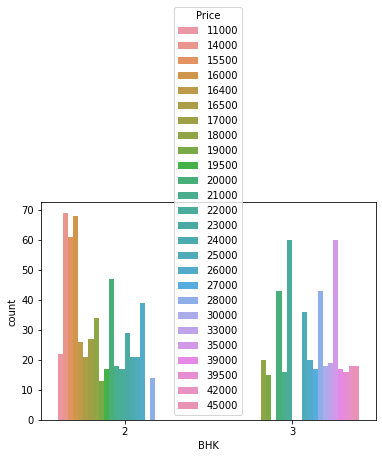

In [ ]:
sns.countplot(x="BHK",hue = "Price",data = house_data)

In [ ]:
house_data.isnull()

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [ ]:
house_data.isnull().sum()

Location      0
BHK           0
Furnishing    0
Sq.ft         0
Old(years)    0
Floor         0
Price         0
dtype: int64

In [ ]:
location = pd.get_dummies(house_data['Location'],drop_first=True)
location.head(5)

,Whitefield
0,0
1,0
2,1
3,1
4,1


In [ ]:
House_data = pd.concat([house_data,location],axis=1)
House_data.head(5)

,Location,BHK,Furnishing,Sq.ft,Old(years),Floor,Price,Whitefield
0,Bommanahalli,3,1,3000,1,3,28000,0
1,Bommanahalli,3,1,1650,10,0,18000,0
2,Whitefield,2,0,1000,5,3,16400,1
3,Whitefield,3,0,1600,1,9,27000,1
4,Whitefield,2,1,1200,5,1,20000,1


In [ ]:
House_data.drop(['Location'],axis=1,inplace=True)
House_data.head()

,BHK,Furnishing,Sq.ft,Old(years),Floor,Price,Whitefield
0,3,1,3000,1,3,28000,0
1,3,1,1650,10,0,18000,0
2,2,0,1000,5,3,16400,1
3,3,0,1600,1,9,27000,1
4,2,1,1200,5,1,20000,1


In [ ]:
x = House_data.drop("Price",axis=1)
y = House_data["Price"]

In [ ]:
x

,BHK,Furnishing,Sq.ft,Old(years),Floor,Whitefield
0,3,1,3000,1,3,0
1,3,1,1650,10,0,0
2,2,0,1000,5,3,1
3,3,0,1600,1,9,1
4,2,1,1200,5,1,1
...,...,...,...,...,...,...
995,3,1,1460,1,2,0
996,3,0,2100,1,7,1
997,2,0,1033,5,0,0
998,3,0,1500,10,1,0


In [ ]:
print(y)

0      28000
1      18000
2      16400
3      27000
4      20000
       ...  
995    25000
996    28000
997    16500
998    22000
999    30000
Name: Price, Length: 1000, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:

x_train.shape

(700, 6)

In [ ]:
x_test.shape

(300, 6)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:


y_pred

array([25797.72536198, 21791.7572978 , 18825.20421616, 33998.39955408,
       33422.98790928, 21516.27323278, 25797.72536198, 20858.50060452,
       22281.78953395, 19057.32373268, 19385.18357305, 21791.7572978 ,
       16401.86839706, 30485.97296784, 16401.86839706, 26193.78229316,
       36060.05081125, 30050.58733149, 18816.66636021, 33998.39955408,
       18757.499388  , 20692.05421199, 36555.23012296, 33422.98790928,
       13555.52141662, 17965.33497975, 13726.79283667, 18941.94482426,
       21516.27323278, 22548.73357775, 18825.20421616, 17226.79975316,
       19057.32373268, 16401.86839706, 15292.31916405, 18825.20421616,
       13555.52141662, 18757.499388  , 18757.499388  , 18757.499388  ,
       21791.7572978 , 33699.2144653 , 22636.5627488 , 32303.32293115,
       14800.51974375, 22372.56578832, 13726.79283667, 19385.18357305,
       16401.86839706, 33422.98790928, 36185.02245494, 24392.36873587,
       16401.86839706, 13555.52141662, 19385.18357305, 33998.39955408,
      

In [ ]:
df = pd.DataFrame({'Actual':y_test, 'predicted':y_pred})
print(df.head(20))

     Actual     predicted
993   26000  25797.725362
859   23000  21791.757298
298   20000  18825.204216
553   30000  33998.399554
672   35000  33422.987909
971   25000  21516.273233
27    26000  25797.725362
231   19000  20858.500605
306   25000  22281.789534
706   14000  19057.323733
496   16400  19385.183573
558   23000  21791.757298
784   15500  16401.868397
239   27000  30485.972968
578   15500  16401.868397
55    24000  26193.782293
906   28000  36060.050811
175   33000  30050.587331
14    16000  18816.666360
77    30000  33998.399554


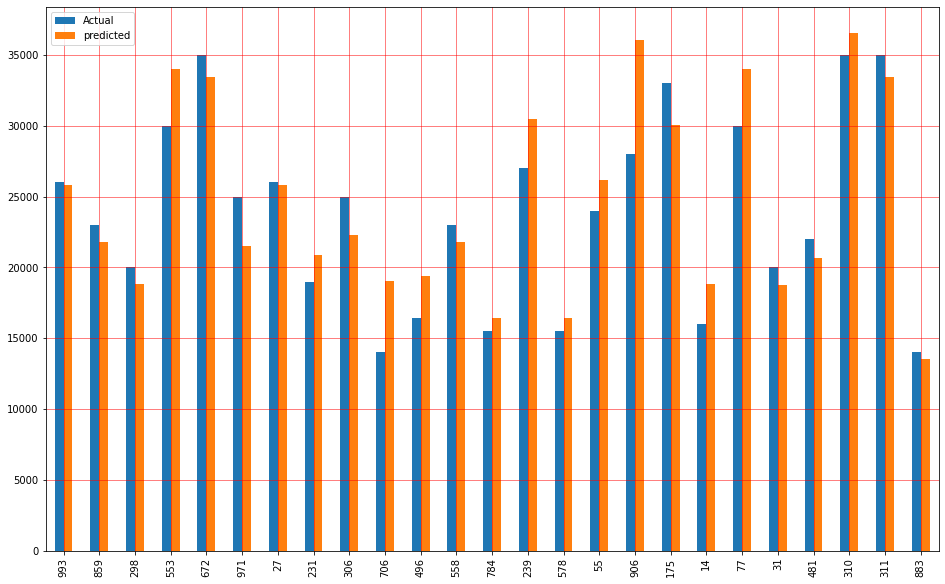

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='pink')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print('Test Score:',regressor.score(x_test,y_test))
print('Test score:',regressor.score(x_test,y_pred))

Train Score: 0.8411110831099107
Test score: 1.0
